In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%cd Desktop/

/Users/dzaasgojak/Desktop


In [145]:
data = pd.read_csv("finalcsv.csv", sep=";")
data.head()

,Titre,mois_sortie,annee_sortie,date_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,Scer,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards
0,#No_Filter,5,2023,5-mai-23,87.0,Epouvante-horreur,Michael Dupret,Hanh McIver,Jasmine Daoud,"1,6",NaN,Belgique,0.0,Anglais,NaN,NaN,NaN
1,10,12,2022,22-déc-22,124.0,Drame,Karm Chawla,Viy Rajkumar,Anusha Rangath,NaN,NaN,Inde,0.0,-,NaN,NaN,NaN
2,13 : La comédie musicale,8,2022,12-août-22,94.0,Drame,Tamra Davis,Eli Golden,Josh Peck,"2,6",Robert Horn,U.S.A.,0.0,Anglais,1.0,NaN,0.0
3,13 Minutes,3,2022,23-mars-22,NaN,Policier,NaN,Jimmy Waitman,NaN,3,NaN,U.S.A.,0.0,Anglais,NaN,0.0,0.0
4,16 ans,1,2023,4-janv-23,94.0,Drame,Philippe Lioret,Sabri Levoye,Teïlo Azaïs,"3,6",Philippe Lioret,France,1.0,Français,4.0,NaN,0.0


In [146]:
moyenne_real_awards = data['real awards'].mean()
data['real awards'] = data['real awards'].fillna(moyenne_real_awards)
data['first actor awards'] = data['first actor awards'].fillna(0)
data['Second actor awards'] = data['Second actor awards'].fillna(0)
data['nomitions	'] = data['nomitions'].fillna(0)
data = data.drop(['Scer'], axis=1)
data = data.drop(['date_sortie'], axis=1)
data = data.dropna()

In [147]:
data.head()

,Titre,mois_sortie,annee_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards,nomitions\t
0,#No_Filter,5,2023,87.0,Epouvante-horreur,Michael Dupret,Hanh McIver,Jasmine Daoud,"1,6",Belgique,0.0,Anglais,1.908922,0.0,0.0,0.0
2,13 : La comédie musicale,8,2022,94.0,Drame,Tamra Davis,Eli Golden,Josh Peck,"2,6",U.S.A.,0.0,Anglais,1.000000,0.0,0.0,0.0
4,16 ans,1,2023,94.0,Drame,Philippe Lioret,Sabri Levoye,Teïlo Azaïs,"3,6",France,1.0,Français,4.000000,0.0,0.0,1.0
5,1UP,7,2022,100.0,Comédie,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,"2,2",Cada,0.0,Anglais,0.000000,0.0,0.0,0.0
6,20th Century Girl,10,2022,119.0,Drame,Woo-ri Bang,Yoo-jeong Kim,Hyo-ju Han,"3,9",Corée du Sud,0.0,Coréen,1.908922,0.0,0.0,0.0


In [148]:
data.shape

(2156, 16)

In [149]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [150]:
data['Titre'] = labelencoder.fit_transform(data['Titre'])
data['genre1'] = labelencoder.fit_transform(data['genre1'])
data['actor_1'] = labelencoder.fit_transform(data['actor_1'])
data['actor 2'] = labelencoder.fit_transform(data['actor 2'])
data['réalisateur_1'] = labelencoder.fit_transform(data['réalisateur_1'])
data['tiolity 1'] = labelencoder.fit_transform(data['tiolity 1'])
data['language'] = labelencoder.fit_transform(data['language'])


In [151]:
data.head()

,Titre,mois_sortie,annee_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards,nomitions\t
0,0,5,2023,87.0,11,1286,677,806,"1,6",8,0.0,13,1.908922,0.0,0.0,0.0
2,6,8,2022,94.0,10,1813,481,895,"2,6",77,0.0,13,1.000000,0.0,0.0,0.0
4,8,1,2023,94.0,10,1505,1466,1744,"3,6",28,1.0,67,4.000000,0.0,0.0,1.0
5,9,7,2022,100.0,6,1055,1328,1735,"2,2",14,0.0,13,0.000000,0.0,0.0,0.0
6,10,10,2022,119.0,10,1936,1759,728,"3,9",19,0.0,48,1.908922,0.0,0.0,0.0


In [152]:
data.dtypes

Titre                    int64
mois_sortie              int64
annee_sortie             int64
duree_min              float64
genre1                   int64
réalisateur_1            int64
actor_1                  int64
actor 2                  int64
note_spectators         object
tiolity 1                int64
nomitions              float64
language                 int64
real awards            float64
first actor awards     float64
Second actor awards    float64
nomitions\t            float64
dtype: object

In [153]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

data['mois_sortie'] = scaler.fit_transform(data['mois_sortie'].values.reshape(-1, 1))
data['annee_sortie'] = scaler.fit_transform(data['annee_sortie'].values.reshape(-1, 1))
data['duree_min'] = scaler.fit_transform(data['duree_min'].values.reshape(-1, 1))
data['genre1'] = scaler.fit_transform(data['genre1'].values.reshape(-1, 1))
data['réalisateur_1'] = scaler.fit_transform(data['réalisateur_1'].values.reshape(-1, 1))
data['actor_1'] = scaler.fit_transform(data['actor_1'].values.reshape(-1, 1))
data['actor 2'] = scaler.fit_transform(data['actor 2'].values.reshape(-1, 1))
data['tiolity 1'] = scaler.fit_transform(data['tiolity 1'].values.reshape(-1, 1))
data['nomitions'] = scaler.fit_transform(data['nomitions'].values.reshape(-1, 1))
data['language'] = scaler.fit_transform(data['language'].values.reshape(-1, 1))
data['real awards'] = scaler.fit_transform(data['real awards'].values.reshape(-1, 1))
data['first actor awards'] = scaler.fit_transform(data['first actor awards'].values.reshape(-1, 1))
data['Second actor awards'] = scaler.fit_transform(data['Second actor awards'].values.reshape(-1, 1))
data['nomitions\t'] = scaler.fit_transform(data['nomitions\t'].values.reshape(-1, 1))


In [154]:
data.dtypes

Titre                    int64
mois_sortie            float64
annee_sortie           float64
duree_min              float64
genre1                 float64
réalisateur_1          float64
actor_1                float64
actor 2                float64
note_spectators         object
tiolity 1              float64
nomitions              float64
language               float64
real awards            float64
first actor awards     float64
Second actor awards    float64
nomitions\t            float64
dtype: object

In [155]:
data['note_spectators'] = data['note_spectators'].str.replace(',', '.')

In [156]:
data['note_spectators'] = data['note_spectators'].astype(float)

In [157]:
data.dtypes

Titre                    int64
mois_sortie            float64
annee_sortie           float64
duree_min              float64
genre1                 float64
réalisateur_1          float64
actor_1                float64
actor 2                float64
note_spectators        float64
tiolity 1              float64
nomitions              float64
language               float64
real awards            float64
first actor awards     float64
Second actor awards    float64
nomitions\t            float64
dtype: object

In [158]:
data['note_spectators'] = np.where(data['note_spectators'] >= 3.1, 1, 0)

In [159]:
data.head(50)

,Titre,mois_sortie,annee_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards,nomitions\t
0,0,0.363636,1.000000,0.351852,0.44,0.646881,0.373208,0.415036,0,0.1000,0.000000,0.082278,0.036017,0.000000,0.000000,0.000000
2,6,0.636364,0.923077,0.395062,0.40,0.911972,0.265160,0.460865,0,0.9625,0.000000,0.082278,0.018868,0.000000,0.000000,0.000000
4,8,0.000000,1.000000,0.395062,0.40,0.757042,0.808159,0.898043,1,0.3500,0.000824,0.424051,0.075472,0.000000,0.000000,0.000824
5,9,0.545455,0.923077,0.432099,0.24,0.530684,0.732084,0.893409,0,0.1750,0.000000,0.082278,0.000000,0.000000,0.000000,0.000000
6,10,0.818182,0.923077,0.549383,0.40,0.973843,0.969680,0.374871,1,0.2375,0.000000,0.303797,0.036017,0.000000,0.000000,0.000000
7,13,0.272727,0.923077,0.469136,0.40,0.113179,0.671996,0.054583,0,0.7500,0.001647,0.151899,0.036017,0.000000,0.000000,0.001647
8,12,0.636364,0.923077,0.506173,0.40,0.113179,0.671996,0.054583,0,0.7500,0.001647,0.797468,0.036017,0.000000,0.000000,0.001647
9,14,0.000000,1.000000,0.469136,0.00,0.818410,0.072216,0.610196,0,0.9625,0.000000,0.082278,0.000000,0.000000,0.000000,0.000000
10,20,0.363636,1.000000,0.500000,0.40,0.409960,0.934950,0.243048,0,0.8625,0.000824,0.886076,0.056604,0.000000,0.000000,0.000824
11,2135,1.000000,0.923077,0.370370,0.84,0.320423,0.329658,0.868177,1,0.0250,0.000000,0.025316,0.000000,0.000000,0.000000,0.000000


In [160]:
X = data.drop(['note_spectators'], axis=1)
y = data['note_spectators']

In [161]:
nb_rows = int(X.shape[0]*0.2) # Obviously we don't want a floating number

X_valid = X.sample(n=nb_rows, random_state = 0)
valid_index = X_valid.index
y_valid = y[valid_index]

X_intermediate = X.drop(valid_index, axis = 0)
X_test = X_intermediate.sample(n=nb_rows, random_state = 0)
test_index = X_test.index
y_test = y[test_index]

X_train = X_intermediate.drop(test_index, axis = 0)
train_index = X_train.index
y_train = y[train_index]

In [162]:
print("Total # of samples:", data.shape[0])
print("# of training samples:", X_train.shape[0])
print("# of validation samples:", X_valid.shape[0])
print("# of test samples:", X_test.shape[0])

Total # of samples: 2156
# of training samples: 1294
# of validation samples: 431
# of test samples: 431


In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [164]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

/Users/dzaasgojak/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/var/folders/p4/cd9gxlsj3lbcl88d9_4y7hf00000gn/T/ipykernel_91787/1631457752.py:3: UserWarning: Glyph 9 (	) missing from current font.
  dtree.savefig('tree.pdf')
/Users/dzaasgojak/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


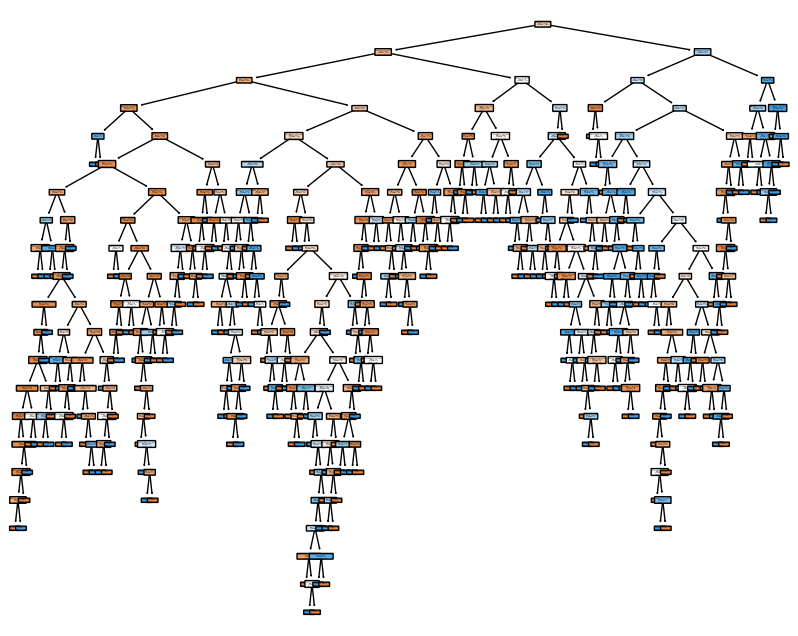

In [170]:
dtree = plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, precision=4)
dtree.savefig('tree.pdf')
plt.show()

In [166]:
from sklearn import metrics

In [167]:
y_pred = model.predict(X_valid)
conf_matrix = metrics.confusion_matrix(y_valid, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

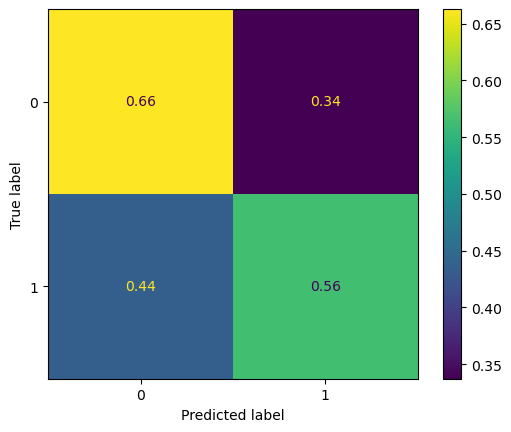

In [168]:
norm_conf_matrix = metrics.confusion_matrix(y_valid, y_pred, normalize = 'true')
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [169]:
y_pred = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
specificity = true_neg / (true_neg + false_pos)
print ("Specificity:",specificity)
sensitivity = true_pos / (true_pos + false_neg)
print ("Sensitivity:",sensitivity)

Specificity: 0.6743295019157088
Sensitivity: 0.4823529411764706
